# Data Wrangling II
Create an “Academic performance” dataset of students and perform the following operations using
Python.
1. Scan all variables for missing values and inconsistencies. If there are missing values and/or
inconsistencies, use any of the suitable techniques to deal with them.
2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable
techniques to deal with them.
3. Apply data transformations on at least one of the variables. The purpose of this
transformation should be one of the following reasons: to change the scale for better
understanding of the variable, to convert a non-linear relation into a linear one, or to
decrease the skewness and convert the distribution into a normal distribution.
Reason and document your approach properly

In [2]:
!pip install scipy
!pip install scikit-learn
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.preprocessing import RobustScaler
import seaborn as sns 
import matplotlib.pyplot as plt

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


## Null points removing

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/manish0222/TE_SEM_6/main/ds_lab/ASGN2/StudentsPerformance_modified.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72.0,74.0
1,female,group C,some college,standard,completed,69,90.0,88.0
2,female,group B,master's degree,standard,none,90,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47,57.0,44.0
4,male,group C,some college,standard,none,76,78.0,75.0


In [4]:
null_cols=df.columns[df.isnull().any()].tolist()
print("NUll columns ",null_cols)
df.isna().sum()

NUll columns  ['math score', 'reading score', 'writing score']


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     8
reading score                  6
writing score                  9
dtype: int64

In [5]:
df.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                      object
reading score                  float64
writing score                  float64
dtype: object

In [6]:
df[null_cols]=df[null_cols].fillna(df[null_cols].mean())
# df=df.ffill()
# df=df.bfill()
df.isna().sum()

C:\Users\USER\AppData\Local\Temp\ipykernel_13800\3965314781.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df[null_cols]=df[null_cols].fillna(df[null_cols].mean())


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     8
reading score                  0
writing score                  0
dtype: int64

In [7]:
df=df.ffill()
df=df.bfill()
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [8]:
df.interpolate(inplace=True)#neglect null values
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99.0,95.0
996,male,group C,high school,free/reduced,none,62,55.0,55.0
997,female,group C,high school,free/reduced,completed,59,71.0,65.0
998,female,group D,some college,standard,completed,68,78.0,77.0
999,female,group D,some college,free/reduced,none,77,86.0,86.0


In [9]:
df.rename(columns={"parental level of education":"Education"},inplace=True)
df.head()

,gender,race/ethnicity,Education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72.0,74.0
1,female,group C,some college,standard,completed,69,90.0,88.0
2,female,group B,master's degree,standard,none,90,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47,57.0,44.0
4,male,group C,some college,standard,none,76,78.0,75.0


# Outliers

In [10]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
print(numeric_cols)

Index(['reading score', 'writing score'], dtype='object')


In [15]:
#IQR
Q1 = df['reading score'].quantile(0.25)
Q3 = df['reading score'].quantile(0.75)
IQR=Q3-Q1
print("IQR ",IQR," ",Q1," ",Q3)
print("The skew is ",df['reading score'].skew())

IQR  21.0   58.0   79.0
The skew is  -0.8169514901112902


In [18]:
upper=Q3+1.5*IQR
lower=Q1-1.5*IQR
df_clean=df[(df['reading score']<=upper) & (df['reading score']>=lower)]
print("Filtered data skew ",df_clean['reading score'].skew())
df_clean

Filtered data skew  -0.15002522771185267


,gender,race/ethnicity,Education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72.0,74.0
1,female,group C,some college,standard,completed,69,90.0,88.0
2,female,group B,master's degree,standard,none,90,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47,57.0,44.0
4,male,group C,some college,standard,none,76,78.0,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99.0,95.0
996,male,group C,high school,free/reduced,none,62,55.0,55.0
997,female,group C,high school,free/reduced,completed,59,71.0,65.0
998,female,group D,some college,standard,completed,68,78.0,77.0


In [20]:
df_outliers=df[(df['reading score']>upper) | (df['reading score']<lower)]
df_outliers

,gender,race/ethnicity,Education,lunch,test preparation course,math score,reading score,writing score
18,male,group C,master's degree,free/reduced,completed,88,22.0,46.000000
19,female,group C,associate's degree,free/reduced,none,88,22.0,61.000000
20,male,group D,high school,standard,none,88,12.0,63.000000
21,female,group B,some college,free/reduced,completed,88,12.0,70.000000
22,male,group D,some college,standard,none,88,13.0,53.000000
23,female,group C,some high school,standard,none,88,14.0,69.487386
24,male,group D,bachelor's degree,free/reduced,completed,74,9.0,80.000000
25,male,group A,master's degree,free/reduced,none,73,8.0,72.000000
26,male,group B,some college,standard,none,69,7.0,55.000000
27,female,group C,bachelor's degree,standard,none,67,6.0,75.000000


Old data skew  -0.8169514901112915


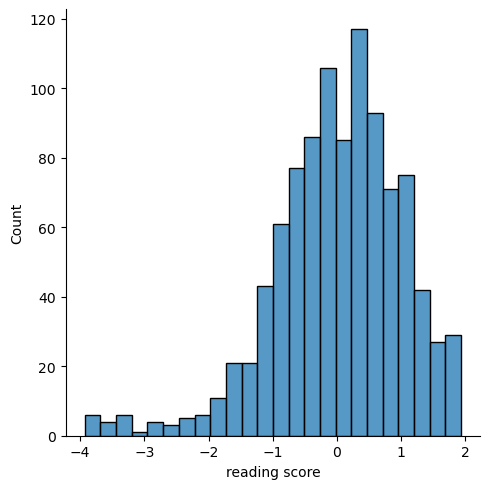

In [34]:
sns.displot(df['reading score'])  
print("Old data skew ",df['reading score'].skew())

Filtered data skew  -0.15002522771185267


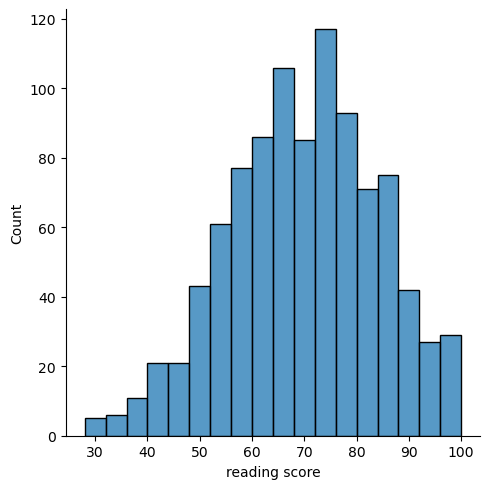

In [32]:
sns.displot(df_clean['reading score'])  
print("Filtered data skew ",df_clean['reading score'].skew())

# z score

In [21]:
z_score=stats.zscore(df['reading score'])
z_score

0      0.241292
1      1.329296
2      1.631519
3     -0.665378
4      0.603960
         ...   
995    1.873298
996   -0.786267
997    0.180847
998    0.603960
999    1.087517
Name: reading score, Length: 1000, dtype: float64

In [23]:
threshold=3
outliers_zscore=df[(abs(z_score)>=threshold)]
outliers_zscore

,gender,race/ethnicity,Education,lunch,test preparation course,math score,reading score,writing score
20,male,group D,high school,standard,none,88,12.0,63.000000
21,female,group B,some college,free/reduced,completed,88,12.0,70.000000
22,male,group D,some college,standard,none,88,13.0,53.000000
23,female,group C,some high school,standard,none,88,14.0,69.487386
24,male,group D,bachelor's degree,free/reduced,completed,74,9.0,80.000000
25,male,group A,master's degree,free/reduced,none,73,8.0,72.000000
26,male,group B,some college,standard,none,69,7.0,55.000000
27,female,group C,bachelor's degree,standard,none,67,6.0,75.000000
28,male,group C,high school,standard,none,70,4.0,69.487386
29,female,group D,master's degree,standard,none,62,3.0,75.000000


In [26]:
print('Old_skew ',df['reading score'].skew())
z_filtered=df[abs(z_score)<threshold]
print("neww skew ",z_filtered['reading score'].skew())
z_filtered

Old_skew  -0.8169514901112902
neww skew  -0.2856081583770433


,gender,race/ethnicity,Education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72.0,74.0
1,female,group C,some college,standard,completed,69,90.0,88.0
2,female,group B,master's degree,standard,none,90,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47,57.0,44.0
4,male,group C,some college,standard,none,76,78.0,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99.0,95.0
996,male,group C,high school,free/reduced,none,62,55.0,55.0
997,female,group C,high school,free/reduced,completed,59,71.0,65.0
998,female,group D,some college,standard,completed,68,78.0,77.0


# scaling

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = df
df_scaled['reading score'] = scaler.fit_transform(df_scaled['reading score'].values.reshape(-1, 1))
df_scaled['writing score'] = scaler.fit_transform(df_scaled['writing score'].values.reshape(-1, 1))
df_scaled
# specific range, typically between 0 and 1.

,gender,race/ethnicity,Education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,0.711340,0.114901
1,female,group C,some college,standard,completed,69,0.896907,0.140036
2,female,group B,master's degree,standard,none,90,0.948454,0.149013
3,male,group A,associate's degree,free/reduced,none,47,0.556701,0.061041
4,male,group C,some college,standard,none,76,0.773196,0.116697
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,0.989691,0.152603
996,male,group C,high school,free/reduced,none,62,0.536082,0.080790
997,female,group C,high school,free/reduced,completed,59,0.701031,0.098743
998,female,group D,some college,standard,completed,68,0.773196,0.120287


In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = df
df_scaled['reading score'] = scaler.fit_transform(df_scaled['reading score'].values.reshape(-1, 1))
df_scaled['writing score'] = scaler.fit_transform(df_scaled['writing score'].values.reshape(-1, 1))
df_scaled
# transform features so that they have a mean of 0 and a standard deviation of 1.

,gender,race/ethnicity,Education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,0.241292,0.153409
1,female,group C,some college,standard,completed,69,1.329296,0.629347
2,female,group B,master's degree,standard,none,90,1.631519,0.799326
3,male,group A,associate's degree,free/reduced,none,47,-0.665378,-0.866459
4,male,group C,some college,standard,none,76,0.603960,0.187405
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,1.873298,0.867317
996,male,group C,high school,free/reduced,none,62,-0.786267,-0.492507
997,female,group C,high school,free/reduced,completed,59,0.180847,-0.152551
998,female,group D,some college,standard,completed,68,0.603960,0.255396
